In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator, img_to_array
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [2]:
path_prefix = './AppML_repo/FinalProject/'
class_names = ['campanian', 'corylus', 'dust', 'grimsvotn', 'qrobur', 'qsuber']

# Icecore 3046

In [3]:
df_data_3046 = pd.read_csv('./test_GRIP_31may2021/GRIP_raw/GRIP_3046_raw.csv')
df_data_3046['imgpath'] = 'test_GRIP_31may2021/GRIP_raw/' + df_data_3046['imgpaths'].str.split('GRIP_raw/').str[1]
df_data_3046.head()

,Sample,Particle ID,Area (ABD),Area (Filled),Aspect Ratio,Biovolume (Cylinder),Biovolume (P. Spheroid),Biovolume (Sphere),Calibration Factor,Calibration Image,...,Sum Intensity,Symmetry,Time,Timestamp,Transparency,Volume (ABD),Volume (ESD),Width,imgpaths,imgpath
0,0,1,0.06,0.00,1.00,0.00,0.00,0.01,0.2752,1,...,117.0,0.00,13:41:07,2020-11-19T12:41:07.322,0.00,0.010913,0.010913,0.28,/home/nico/Desktop/MarieCurie/Flowcam/test/GRI...,test_GRIP_31may2021/GRIP_raw/GRIP_3046_0_20_1/...
1,1,2,0.21,0.21,0.66,0.23,0.06,0.07,0.2752,1,...,1224.0,0.00,13:41:07,2020-11-19T12:41:07.322,0.08,0.071500,0.092098,0.43,/home/nico/Desktop/MarieCurie/Flowcam/test/GRI...,test_GRIP_31may2021/GRIP_raw/GRIP_3046_0_20_1/...
2,2,3,1.45,1.45,0.95,6.44,1.25,1.32,0.2752,1,...,7323.0,0.84,13:41:07,2020-11-19T12:41:07.322,0.10,1.316160,1.781373,1.24,/home/nico/Desktop/MarieCurie/Flowcam/test/GRI...,test_GRIP_31may2021/GRIP_raw/GRIP_3046_0_20_1/...
3,3,4,0.61,0.61,0.86,1.68,0.33,0.35,0.2752,1,...,3611.0,0.00,13:41:07,2020-11-19T12:41:07.322,0.07,0.354768,0.437559,0.82,/home/nico/Desktop/MarieCurie/Flowcam/test/GRI...,test_GRIP_31may2021/GRIP_raw/GRIP_3046_0_20_1/...
4,4,5,0.74,0.74,0.72,2.48,0.41,0.48,0.2752,1,...,3548.0,0.96,13:41:07,2020-11-19T12:41:07.322,0.07,0.477327,0.598305,0.87,/home/nico/Desktop/MarieCurie/Flowcam/test/GRI...,test_GRIP_31may2021/GRIP_raw/GRIP_3046_0_20_1/...


In [4]:
df_3046 = pd.read_csv('./IcecoreData_Predictions_Grip_3046.txt', sep=',', names=['imgpath', 'Prediction'])
df_3046['imgpath'] = df_3046['imgpath'].str[2:-1]
df_3046.head()

,imgpath,Prediction
0,test_GRIP_31may2021/GRIP_raw/GRIP_3046_0_20_1/...,2
1,test_GRIP_31may2021/GRIP_raw/GRIP_3046_0_20_1/...,2
2,test_GRIP_31may2021/GRIP_raw/GRIP_3046_0_20_1/...,2
3,test_GRIP_31may2021/GRIP_raw/GRIP_3046_0_20_1/...,2
4,test_GRIP_31may2021/GRIP_raw/GRIP_3046_0_20_1/...,2


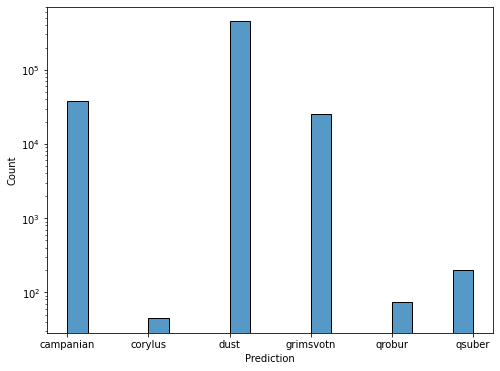

Counter({2: 449600, 0: 38541, 3: 25724, 5: 197, 1: 45, 4: 73})

In [5]:
plt.figure(figsize=(8,6))
sns.histplot(data=df_3046, x='Prediction')
plt.xticks(range(6),class_names)
plt.yscale('log')
plt.show()
Counter(df_3046['Prediction'])

In [6]:
corylus_3046 = df_3046['imgpath'][df_3046['Prediction'] == 1].to_numpy()
df_corylus_3046 = df_data_3046[df_data_3046['imgpath'].isin(corylus_3046)]

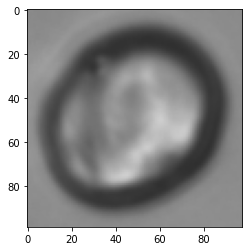

test_GRIP_31may2021/GRIP_raw/GRIP_3046_40_55_3/GRIP_3046_40_55_3_6683.png


In [7]:
#Interesting images index: 0, 1, 17, 18, 19, 20, 24, 37, 39
#for i in range(len(df_corylus_3046['imgpath'])):
filepath = df_corylus_3046['imgpath'].to_numpy()[39]
image = load_img(filepath)#, target_size=(256,256))
plt.imshow(image)
plt.show()
print(filepath)


In [8]:
qrob_3046 = df_3046['imgpath'][df_3046['Prediction'] == 4].to_numpy()
df_qrob_3046 = df_data_3046[df_data_3046['imgpath'].isin(qrob_3046)]

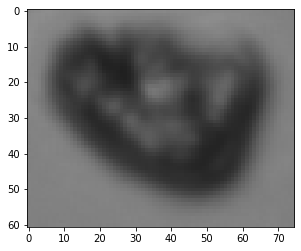

test_GRIP_31may2021/GRIP_raw/GRIP_3046_40_55_3/GRIP_3046_40_55_3_32242.png


In [9]:
filepath = df_qrob_3046['imgpath'].to_numpy()[72]
image = load_img(filepath)#, target_size=(256,256))
plt.imshow(image)
plt.show()
print(filepath)

In [10]:
#Interesting images index: 10, 12, 14, 17, 18, 20, 32, 34, 45, 63, 72
""" for i in range(len(df_qrob_3046['imgpath'])):
    image = load_img(df_qrob_3046['imgpath'].to_numpy()[i])#, target_size=(256,256))
    plt.imshow(image)
    plt.show()
    print(i) """

" for i in range(len(df_qrob_3046['imgpath'])):\n    image = load_img(df_qrob_3046['imgpath'].to_numpy()[i])#, target_size=(256,256))\n    plt.imshow(image)\n    plt.show()\n    print(i) "

In [11]:
qsub_3046 = df_3046['imgpath'][df_3046['Prediction'] == 5].to_numpy()
df_qsub_3046 = df_data_3046[df_data_3046['imgpath'].isin(qsub_3046)]

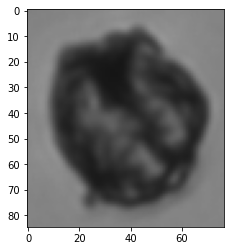

test_GRIP_31may2021/GRIP_raw/GRIP_3046_20_40_3/GRIP_3046_20_40_3_30781.png


In [12]:
filepath = df_qsub_3046['imgpath'].to_numpy()[150]
image = load_img(filepath)#, target_size=(256,256))
plt.imshow(image)
plt.show()
print(filepath)

In [13]:
#Interesting images index: 9, 13, 22, 69, 77, 102, 127, 150, 
""" for i in range(len(df_qsub_3046['imgpath'])):
    image = load_img(df_qsub_3046['imgpath'].to_numpy()[i])#, target_size=(256,256))
    plt.imshow(image)
    plt.show()
    print(i) """

" for i in range(len(df_qsub_3046['imgpath'])):\n    image = load_img(df_qsub_3046['imgpath'].to_numpy()[i])#, target_size=(256,256))\n    plt.imshow(image)\n    plt.show()\n    print(i) "

# Icecore 3136

In [14]:
df_data_3136 = pd.read_csv('./test_GRIP_31may2021/GRIP_raw/GRIP_3136_raw.csv')
df_data_3136['imgpath'] = 'test_GRIP_31may2021/GRIP_raw/' + df_data_3136['imgpaths'].str.split('GRIP_raw/').str[1]
df_data_3136.head()

,Sample,Particle ID,Area (ABD),Area (Filled),Aspect Ratio,Biovolume (Cylinder),Biovolume (P. Spheroid),Biovolume (Sphere),Calibration Factor,Calibration Image,...,Sum Intensity,Symmetry,Time,Timestamp,Transparency,Volume (ABD),Volume (ESD),Width,imgpaths,imgpath
0,0,1,9.85,9.85,0.61,50.00,16.19,23.27,0.2752,1,...,19521.0,0.80,15:56:41,2020-11-20T14:56:41.039,0.10,23.270120,32.063020,2.75,/home/nico/Desktop/MarieCurie/Flowcam/test/GRI...,test_GRIP_31may2021/GRIP_raw/GRIP_3136_0_20_1/...
1,1,2,0.68,0.68,0.84,1.77,0.38,0.42,0.2752,1,...,3918.0,0.00,15:56:41,2020-11-20T14:56:41.313,0.04,0.423324,0.481389,0.83,/home/nico/Desktop/MarieCurie/Flowcam/test/GRI...,test_GRIP_31may2021/GRIP_raw/GRIP_3136_0_20_1/...
2,2,3,10.19,10.19,0.68,46.44,18.72,24.48,0.2752,1,...,23634.0,0.83,15:56:41,2020-11-20T14:56:41.583,0.07,24.475530,30.728550,2.89,/home/nico/Desktop/MarieCurie/Flowcam/test/GRI...,test_GRIP_31may2021/GRIP_raw/GRIP_3136_0_20_1/...
3,3,4,178.99,178.99,0.57,1980.59,1342.22,1801.36,0.2752,1,...,169831.0,0.79,15:56:41,2020-11-20T14:56:41.766,0.11,1801.358000,2522.085000,11.31,/home/nico/Desktop/MarieCurie/Flowcam/test/GRI...,test_GRIP_31may2021/GRIP_raw/GRIP_3136_0_20_1/...
4,4,5,0.74,0.74,0.82,2.28,0.44,0.48,0.2752,1,...,3903.0,0.00,15:56:42,2020-11-20T14:56:42.039,0.06,0.477327,0.571251,0.92,/home/nico/Desktop/MarieCurie/Flowcam/test/GRI...,test_GRIP_31may2021/GRIP_raw/GRIP_3136_0_20_1/...


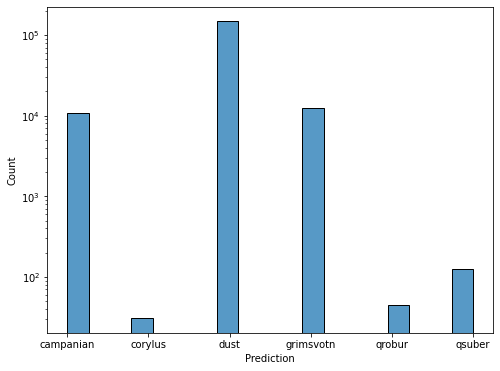

Counter({2: 147316, 3: 12526, 0: 10934, 5: 126, 4: 45, 1: 31})

In [15]:
df_3136 = pd.read_csv('./IcecoreData_Predictions_Grip_3136.txt', sep=',', names=['imgpath', 'Prediction'])
df_3136['imgpath'] = df_3136['imgpath'].str[2:-1]
plt.figure(figsize=(8,6))
sns.histplot(data=df_3136, x='Prediction')
plt.xticks(range(6),class_names)
plt.yscale('log')
plt.show()
Counter(df_3136['Prediction'])

In [16]:
corylus_3136 = df_3136['imgpath'][df_3136['Prediction'] == 1].to_numpy()
df_corylus_3136 = df_data_3136[df_data_3136['imgpath'].isin(corylus_3136)]

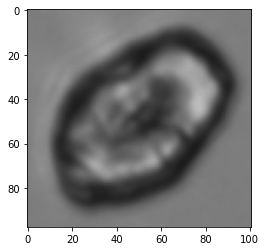

test_GRIP_31may2021/GRIP_raw/GRIP_3136_40_55_2/GRIP_3136_40_55_2_3767.png


In [17]:
filepath = df_corylus_3136['imgpath'].to_numpy()[27]
image = load_img(filepath)#, target_size=(256,256))
plt.imshow(image)
plt.show()
print(filepath)

In [18]:
#Interesting images index: 0, 19*, 21, 27, 
""" for i in range(len(df_corylus_3136['imgpath'])):
    image = load_img(df_corylus_3136['imgpath'].to_numpy()[i])#, target_size=(256,256))
    plt.imshow(image)
    plt.show()
    print(i) """

" for i in range(len(df_corylus_3136['imgpath'])):\n    image = load_img(df_corylus_3136['imgpath'].to_numpy()[i])#, target_size=(256,256))\n    plt.imshow(image)\n    plt.show()\n    print(i) "

In [19]:
qrob_3136 = df_3136['imgpath'][df_3136['Prediction'] == 4].to_numpy()
df_qrob_3136 = df_data_3136[df_data_3136['imgpath'].isin(qrob_3136)]

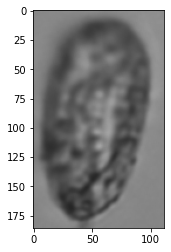

test_GRIP_31may2021/GRIP_raw/GRIP_3136_40_55_3/GRIP_3136_40_55_3_912.png


In [20]:
filepath = df_qrob_3136['imgpath'].to_numpy()[41]
image = load_img(filepath)#, target_size=(256,256))
plt.imshow(image)
plt.show()
print(filepath)

In [21]:
#Interesting images index: 17, 28, 34, 41, 
""" for i in range(len(df_qrob_3136['imgpath'])):
    image = load_img(df_qrob_3136['imgpath'].to_numpy()[i])#, target_size=(256,256))
    plt.imshow(image)
    plt.show()
    print(i) """

" for i in range(len(df_qrob_3136['imgpath'])):\n    image = load_img(df_qrob_3136['imgpath'].to_numpy()[i])#, target_size=(256,256))\n    plt.imshow(image)\n    plt.show()\n    print(i) "

In [22]:
qsub_3136 = df_3136['imgpath'][df_3136['Prediction'] == 5].to_numpy()
df_qsub_3136 = df_data_3136[df_data_3136['imgpath'].isin(qsub_3136)]

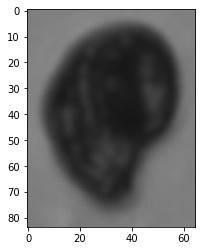

test_GRIP_31may2021/GRIP_raw/GRIP_3136_40_55_3/GRIP_3136_40_55_3_1559.png


In [23]:
filepath = df_qsub_3136['imgpath'].to_numpy()[114]
image = load_img(filepath)#, target_size=(256,256))
plt.imshow(image)
plt.show()
print(filepath)

In [24]:
#Interesting images index: 59*, 66, 102, 114, 
""" for i in range(len(df_qsub_3136['imgpath'])):
    image = load_img(df_qsub_3136['imgpath'].to_numpy()[i])#, target_size=(256,256))
    plt.imshow(image)
    plt.show()
    print(i) """

" for i in range(len(df_qsub_3136['imgpath'])):\n    image = load_img(df_qsub_3136['imgpath'].to_numpy()[i])#, target_size=(256,256))\n    plt.imshow(image)\n    plt.show()\n    print(i) "

# Icecore 3303

In [25]:
df_data_3303 = pd.read_csv('./test_GRIP_31may2021/GRIP_raw/GRIP_3303_raw.csv')
df_data_3303['imgpath'] = 'test_GRIP_31may2021/GRIP_raw/' + df_data_3303['imgpaths'].str.split('GRIP_raw/').str[1]

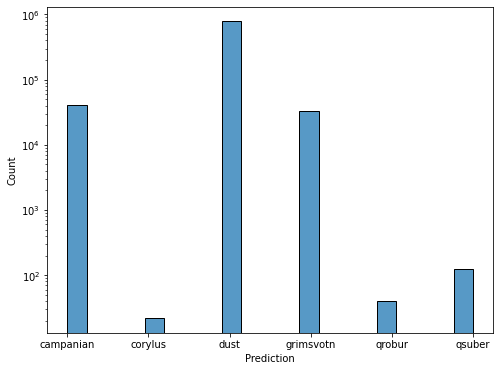

Counter({2: 780102, 3: 32752, 0: 41252, 5: 122, 4: 40, 1: 22})

In [26]:
df_3303 = pd.read_csv('./IcecoreData_Predictions_Grip_3303.txt', sep=',', names=['imgpath', 'Prediction'])
df_3303['imgpath'] = df_3303['imgpath'].str[2:-1]
plt.figure(figsize=(8,6))
sns.histplot(data=df_3303, x='Prediction')
plt.xticks(range(6),class_names)
plt.yscale('log')
plt.show()
Counter(df_3303['Prediction'])

In [27]:
corylus_3303 = df_3303['imgpath'][df_3303['Prediction'] == 1].to_numpy()
df_corylus_3303 = df_data_3303[df_data_3303['imgpath'].isin(corylus_3303)]

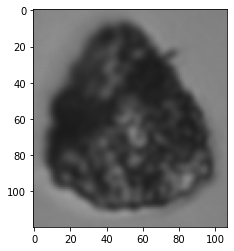

test_GRIP_31may2021/GRIP_raw/GRIP_3303_20_40_3/GRIP_3303_20_40_3_34168.png


In [28]:
filepath = df_corylus_3303['imgpath'].to_numpy()[18]
image = load_img(filepath)#, target_size=(256,256))
plt.imshow(image)
plt.show()
print(filepath)

In [29]:
#Interesting images index: 0, 16, 18
""" for i in range(len(df_corylus_3303['imgpath'])):
    image = load_img(df_corylus_3303['imgpath'].to_numpy()[i])#, target_size=(256,256))
    plt.imshow(image)
    plt.show()
    print(i) """

" for i in range(len(df_corylus_3303['imgpath'])):\n    image = load_img(df_corylus_3303['imgpath'].to_numpy()[i])#, target_size=(256,256))\n    plt.imshow(image)\n    plt.show()\n    print(i) "

In [30]:
qrob_3303 = df_3303['imgpath'][df_3303['Prediction'] == 4].to_numpy()
df_qrob_3303 = df_data_3303[df_data_3303['imgpath'].isin(qrob_3303)]

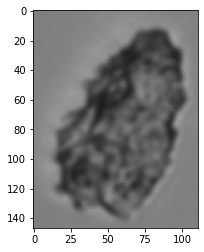

test_GRIP_31may2021/GRIP_raw/GRIP_3303_20_40_3/GRIP_3303_20_40_3_26836.png


In [31]:
filepath = df_qrob_3303['imgpath'].to_numpy()[26]
image = load_img(filepath)#, target_size=(256,256))
plt.imshow(image)
plt.show()
print(filepath)

In [32]:
#Interesting images index: 8, 12, 18, 26
""" for i in range(len(df_qrob_3303['imgpath'])):
    image = load_img(df_qrob_3303['imgpath'].to_numpy()[i])#, target_size=(256,256))
    plt.imshow(image)
    plt.show()
    print(i) """

" for i in range(len(df_qrob_3303['imgpath'])):\n    image = load_img(df_qrob_3303['imgpath'].to_numpy()[i])#, target_size=(256,256))\n    plt.imshow(image)\n    plt.show()\n    print(i) "

In [33]:
qsub_3303 = df_3303['imgpath'][df_3303['Prediction'] == 5].to_numpy()
df_qsub_3303 = df_data_3303[df_data_3303['imgpath'].isin(qsub_3303)]

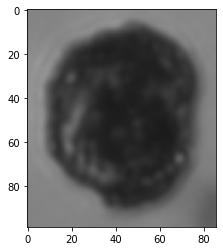

test_GRIP_31may2021/GRIP_raw/GRIP_3303_20_40_2/GRIP_3303_20_40_2_32105.png


In [34]:
filepath = df_qsub_3303['imgpath'].to_numpy()[67]
image = load_img(filepath)#, target_size=(256,256))
plt.imshow(image)
plt.show()
print(filepath)

In [35]:
#Interesting images index: 5, 30, 33, 47, 67, 
""" for i in range(len(df_qsub_3303['imgpath'])):
    image = load_img(df_qsub_3303['imgpath'].to_numpy()[i])#, target_size=(256,256))
    plt.imshow(image)
    plt.show()
    print(i) """

" for i in range(len(df_qsub_3303['imgpath'])):\n    image = load_img(df_qsub_3303['imgpath'].to_numpy()[i])#, target_size=(256,256))\n    plt.imshow(image)\n    plt.show()\n    print(i) "

# Icecore 3306

In [36]:
df_data_3306 = pd.read_csv('./test_GRIP_31may2021/GRIP_raw/GRIP_3306_raw.csv')
df_data_3306['imgpath'] = 'test_GRIP_31may2021/GRIP_raw/' + df_data_3306['imgpaths'].str.split('GRIP_raw/').str[1]

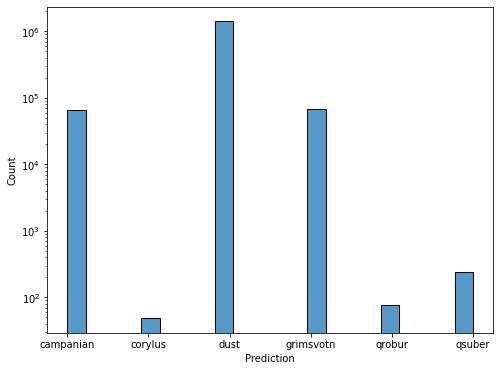

Counter({2: 1412194, 0: 65290, 3: 67765, 4: 76, 5: 241, 1: 49})

In [37]:
df_3306 = pd.read_csv('./IcecoreData_Predictions_Grip_3306.txt', sep=',', names=['imgpath', 'Prediction'])
df_3306['imgpath'] = df_3306['imgpath'].str[2:-1]
plt.figure(figsize=(8,6))
sns.histplot(data=df_3306, x='Prediction')
plt.xticks(range(6),class_names)
plt.yscale('log')
plt.show()
Counter(df_3306['Prediction'])

In [38]:
corylus_3306 = df_3306['imgpath'][df_3306['Prediction'] == 1].to_numpy()
df_corylus_3306 = df_data_3306[df_data_3306['imgpath'].isin(corylus_3306)]

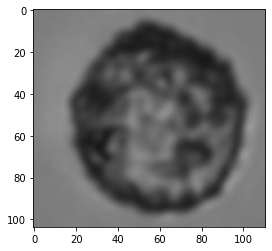

test_GRIP_31may2021/GRIP_raw/GRIP_3306_20_40_3/GRIP_3306_20_40_3_42774.png


In [39]:
filepath = df_corylus_3306['imgpath'].to_numpy()[39]
image = load_img(filepath)#, target_size=(256,256))
plt.imshow(image)
plt.show()
print(filepath)

In [40]:
#Interesting images index: 6, 15, 20, 39, 
""" for i in range(len(df_corylus_3306['imgpath'])):
    image = load_img(df_corylus_3306['imgpath'].to_numpy()[i])#, target_size=(256,256))
    plt.imshow(image)
    plt.show()
    print(i) """

" for i in range(len(df_corylus_3306['imgpath'])):\n    image = load_img(df_corylus_3306['imgpath'].to_numpy()[i])#, target_size=(256,256))\n    plt.imshow(image)\n    plt.show()\n    print(i) "

In [41]:
qrob_3306 = df_3306['imgpath'][df_3306['Prediction'] == 4].to_numpy()
df_qrob_3306 = df_data_3306[df_data_3306['imgpath'].isin(qrob_3306)]

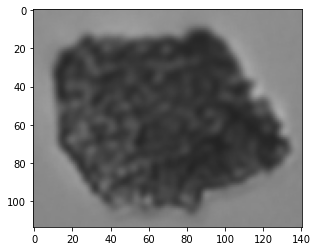

test_GRIP_31may2021/GRIP_raw/GRIP_3306_40_55_1/GRIP_3306_40_55_1_100.png


In [42]:
filepath = df_qrob_3306['imgpath'].to_numpy()[66]
image = load_img(filepath)#, target_size=(256,256))
plt.imshow(image)
plt.show()
print(filepath)

In [43]:
#Interesting images index: 3, 8, 23, 32, 37, 39, 55, 59, 66, 
"""for i in range(len(df_qrob_3306['imgpath'])):
    image = load_img(df_qrob_3306['imgpath'].to_numpy()[i])#, target_size=(256,256))
    plt.imshow(image)
    plt.show()
    print(i) """

"for i in range(len(df_qrob_3306['imgpath'])):\n    image = load_img(df_qrob_3306['imgpath'].to_numpy()[i])#, target_size=(256,256))\n    plt.imshow(image)\n    plt.show()\n    print(i) "

In [44]:
qsub_3306 = df_3306['imgpath'][df_3306['Prediction'] == 5].to_numpy()
df_qsub_3306 = df_data_3306[df_data_3306['imgpath'].isin(qsub_3306)]

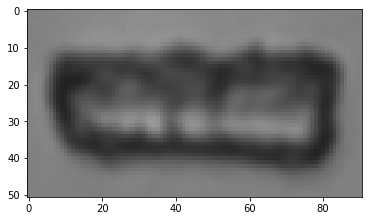

test_GRIP_31may2021/GRIP_raw/GRIP_3306_40_55_2/GRIP_3306_40_55_2_40841.png


In [45]:
filepath = df_qsub_3306['imgpath'].to_numpy()[220]
image = load_img(filepath)#, target_size=(256,256))
plt.imshow(image)
plt.show()
print(filepath)

In [46]:
#Interesting images index: 15, 22, 33, 37, 40, 57, 70, 135, 145, 173, 220, 
""" for i in range(len(df_qsub_3306['imgpath'])):
    image = load_img(df_qsub_3306['imgpath'].to_numpy()[i])#, target_size=(256,256))
    plt.imshow(image)
    plt.show()
    print(i) """

" for i in range(len(df_qsub_3306['imgpath'])):\n    image = load_img(df_qsub_3306['imgpath'].to_numpy()[i])#, target_size=(256,256))\n    plt.imshow(image)\n    plt.show()\n    print(i) "

# Combine histograms

In [47]:
df_3046['Icecore'] = 3046
df_3136['Icecore'] = 3136
df_3303['Icecore'] = 3303
df_3306['Icecore'] = 3306

In [48]:
df_3046['Depth'] = df_3046['imgpath'].str[39:44]
df_3136['Depth'] = df_3136['imgpath'].str[39:44]
df_3303['Depth'] = df_3303['imgpath'].str[39:44]
df_3306['Depth'] = df_3306['imgpath'].str[39:44]

In [49]:
df_all_predicts = pd.concat([df_3046, df_3136, df_3303, df_3306])
df_all_predicts.head()

,imgpath,Prediction,Icecore,Depth
0,test_GRIP_31may2021/GRIP_raw/GRIP_3046_0_20_1/...,2,3046,0_20_
1,test_GRIP_31may2021/GRIP_raw/GRIP_3046_0_20_1/...,2,3046,0_20_
2,test_GRIP_31may2021/GRIP_raw/GRIP_3046_0_20_1/...,2,3046,0_20_
3,test_GRIP_31may2021/GRIP_raw/GRIP_3046_0_20_1/...,2,3046,0_20_
4,test_GRIP_31may2021/GRIP_raw/GRIP_3046_0_20_1/...,2,3046,0_20_


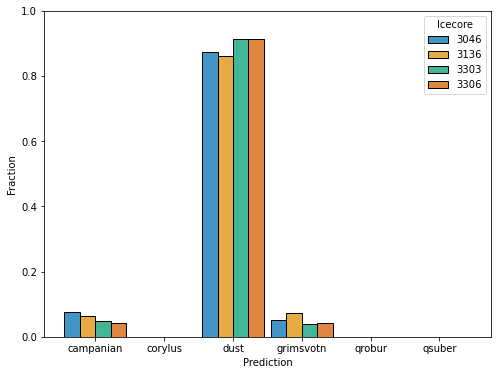

In [50]:
plt.figure(figsize=(8,6))
sns.histplot(data=df_all_predicts, x='Prediction', hue='Icecore', multiple='dodge', palette='colorblind', discrete=True, stat='probability', common_norm=False, shrink=0.9) #shrink=1, common_bins=True, common_norm=False, stat='probability', fill=True
plt.xticks(range(6),class_names)
plt.ylim(0,1)
plt.ylabel('Fraction')
#plt.yscale('log')
#plt.savefig('./PredictionDistributionIcecore.pdf', dpi=500)
plt.show()

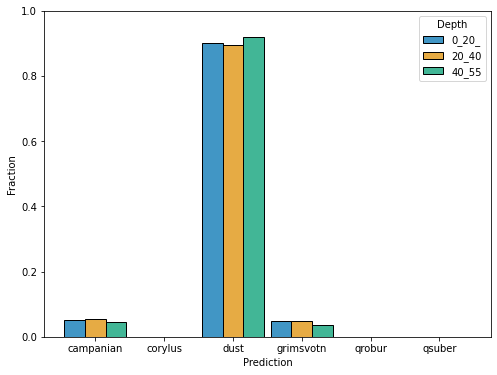

In [51]:
plt.figure(figsize=(8,6))
sns.histplot(data=df_all_predicts, x='Prediction', hue='Depth', multiple='dodge', palette='colorblind', discrete=True, stat='probability', common_norm=False, shrink=0.9) #shrink=1, common_bins=True, common_norm=False, stat='probability', fill=True
plt.xticks(range(6),class_names)
plt.ylim(0,1)
plt.ylabel('Fraction')
#plt.yscale('log')
#plt.savefig('./PredictionDistributionDepth.pdf', dpi=500)
plt.show()

In [65]:
print(Counter(df_all_predicts['Prediction']))
len(df_all_predicts['Prediction'])

Counter({2: 2789212, 0: 156017, 3: 138767, 5: 686, 4: 234, 1: 147})


3085063

# Certainty on predictions of pollen

In [53]:
df_data_pollen = pd.concat([df_corylus_3046, df_qrob_3046, df_qsub_3046, df_corylus_3136, df_qrob_3136, df_qsub_3136, df_corylus_3303, df_qrob_3303, df_qsub_3303, df_corylus_3306, df_qrob_3306, df_qsub_3306])
len(df_data_pollen)

1067

In [54]:
df_data = pd.read_pickle('./CleanedData.pkl')

df_data = df_data.sort_values('imgpaths', axis=0)

header_best = ['Area (ABD)', 'Area (Filled)', 'Aspect Ratio', 'Biovolume (Cylinder)', 'Biovolume (P. Spheroid)', 'Biovolume (Sphere)', 'Circle Fit', 'Circularity', 'Circularity (Hu)', 'Compactness', 'Convex Perimeter', 'Convexity', 'Diameter (ABD)', 'Diameter (ESD)', 'Edge Gradient', 'Elongation', 'Feret Angle Max', 'Feret Angle Min', 'Fiber Curl', 'Fiber Straightness', 'Geodesic Aspect Ratio', 'Geodesic Length', 'Geodesic Thickness', 'Intensity', 'Length', 'Particles Per Chain', 'Perimeter', 'Roughness', 'Sigma Intensity', 'Sphere Complement', 'Sphere Count', 'Sphere Unknown', 'Sphere Volume', 'Sum Intensity', 'Symmetry', 'Transparency', 'Volume (ABD)', 'Volume (ESD)', 'Width']


data_train, data_test = train_test_split(df_data, test_size=0.25, random_state=42)

train_num = data_train[header_best]
icecore_num = df_data_pollen[header_best]

NumTransformer = StandardScaler()
NumTransformer.fit(train_num)
NumInput_train = NumTransformer.transform(train_num)

NumInput_icecore = NumTransformer.transform(icecore_num)

In [55]:
model = tf.keras.models.load_model('Saved_models/UlrikMixedModel_ES2')

In [56]:
def generator_func_icecore():
    for path, nums in zip(df_data_pollen['imgpath'], NumInput_icecore):
        image = img_to_array(load_img(path, color_mode='grayscale', target_size=(256,256))) * 1./255
        image = image.reshape(256,256,1)
        nums = nums.reshape(len(header_best))
        yield {'img': image, 'num': nums}
output_shape = {'img':[256,256,1], 'num':[len(header_best)]}

IcecoreDataset = tf.data.Dataset.from_generator(generator_func_icecore, output_types=({'img':tf.float32,'num':tf.float32}), output_shapes=output_shape).batch(10)

In [57]:
predictions = model.predict(IcecoreDataset)

In [58]:
pred_max = np.max(predictions, axis=-1)

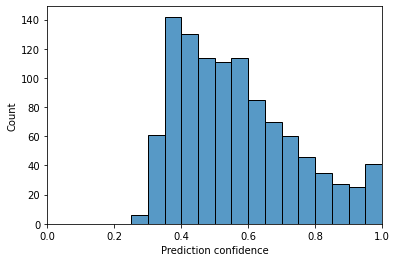

In [59]:
plt.figure(figsize=(6,4))
sns.histplot(x=pred_max, bins=20, binrange=(0,1))
plt.xlabel('Prediction confidence')
plt.xlim(0,1)
#plt.savefig('./PredictionConfidence.pdf', dpi=500)
plt.show()

# Most interesting images

In [60]:
interesting_images = ['test_GRIP_31may2021/GRIP_raw/GRIP_3046_0_20_1/GRIP_3046_0_20_1_1358.png','test_GRIP_31may2021/GRIP_raw/GRIP_3046_20_40_2/GRIP_3046_20_40_2_25159.png', 'test_GRIP_31may2021/GRIP_raw/GRIP_3136_20_40_3/GRIP_3136_20_40_3_16380.png', 'test_GRIP_31may2021/GRIP_raw/GRIP_3136_40_55_2/GRIP_3136_40_55_2_3767.png', 'test_GRIP_31may2021/GRIP_raw/GRIP_3136_40_55_3/GRIP_3136_40_55_3_912.png', 'test_GRIP_31may2021/GRIP_raw/GRIP_3136_20_40_2/GRIP_3136_20_40_2_856.png', 'test_GRIP_31may2021/GRIP_raw/GRIP_3303_0_20_1/GRIP_3303_0_20_1_1962.png', 'test_GRIP_31may2021/GRIP_raw/GRIP_3306_20_40_3/GRIP_3306_20_40_3_42774.png', 'test_GRIP_31may2021/GRIP_raw/GRIP_3306_0_20_3/GRIP_3306_0_20_3_100001.png', 'test_GRIP_31may2021/GRIP_raw/GRIP_3306_20_40_3/GRIP_3306_20_40_3_10107.png', 'test_GRIP_31may2021/GRIP_raw/GRIP_3306_40_55_2/GRIP_3306_40_55_2_40841.png']

In [61]:
df_interesting = df_data_pollen[df_data_pollen['imgpath'].isin(interesting_images)]

In [62]:
interesting_num = df_interesting[header_best]

NumInput_interesting = NumTransformer.transform(interesting_num)

def generator_func_interesting():
    for path, nums in zip(df_interesting['imgpath'], NumInput_interesting):
        image = img_to_array(load_img(path, color_mode='grayscale', target_size=(256,256))) * 1./255
        image = image.reshape(256,256,1)
        nums = nums.reshape(len(header_best))
        yield {'img': image, 'num': nums}
output_shape = {'img':[256,256,1], 'num':[len(header_best)]}

InterestingDataset = tf.data.Dataset.from_generator(generator_func_interesting, output_types=({'img':tf.float32,'num':tf.float32}), output_shapes=output_shape).batch(10)

In [63]:
predicts = model.predict(InterestingDataset)

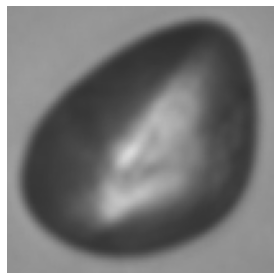

[1.1303158e-06 9.9940193e-01 7.8186339e-11 1.1461394e-07 4.2868865e-04
 1.6819057e-04]


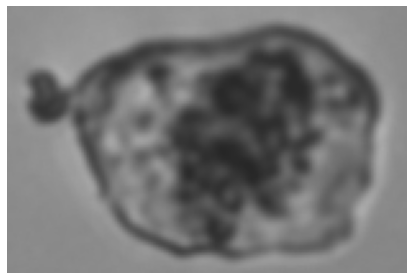

[1.8255776e-02 3.0096903e-04 1.0181508e-09 3.2657979e-05 8.6149883e-01
 1.1991177e-01]


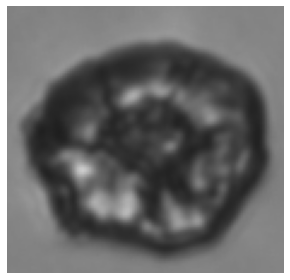

[2.9380687e-06 9.9995863e-01 1.8170185e-08 1.4246477e-07 8.8509960e-06
 2.9389505e-05]


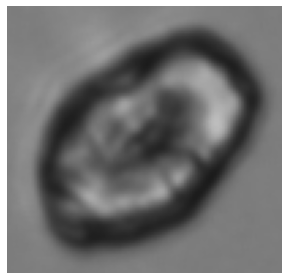

[3.7109980e-01 6.1746049e-01 4.4244378e-05 3.3188460e-03 6.5476070e-03
 1.5289625e-03]


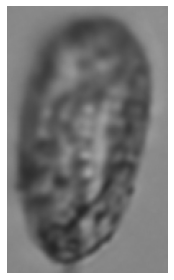

[2.8478768e-02 6.5543372e-03 2.2386473e-08 7.5916396e-05 8.1356519e-01
 1.5132570e-01]


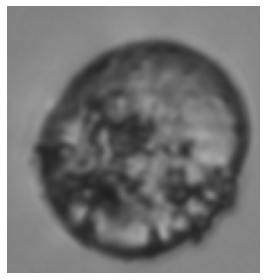

[6.14764809e-04 2.20327129e-04 1.72400316e-08 1.05727675e-04
 3.83607626e-01 6.15451515e-01]


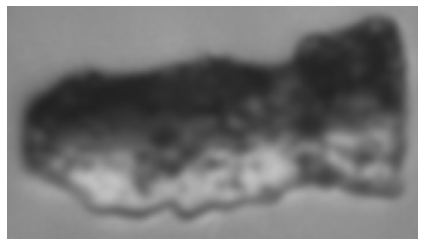

[1.2898172e-02 4.5449850e-01 1.6912613e-04 3.4325566e-02 6.2597111e-02
 4.3551150e-01]


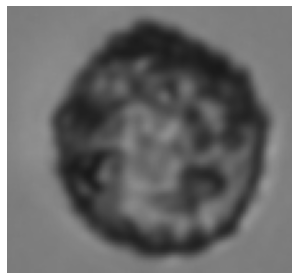

[7.2736887e-04 9.9872988e-01 3.2657887e-08 2.6652865e-06 3.4889672e-04
 1.9127219e-04]


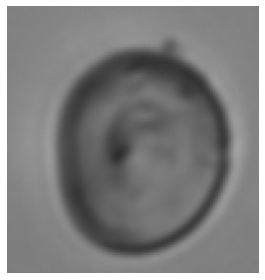

[6.5357034e-07 4.9038277e-05 7.2936344e-11 1.1752458e-06 9.8559779e-01
 1.4351362e-02]


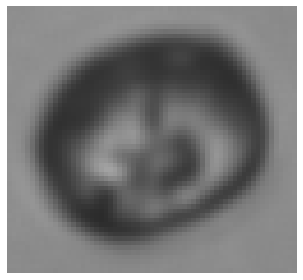

[1.2582049e-02 1.2458105e-03 1.4378072e-07 3.8615428e-03 2.8700331e-01
 6.9530714e-01]


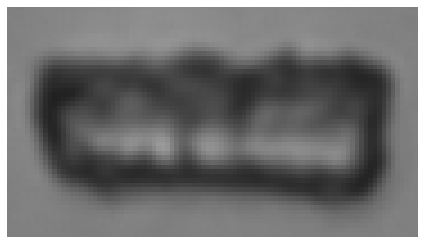

[9.2605222e-04 1.3886215e-02 7.0105905e-08 1.5997047e-04 4.4814149e-01
 5.3688622e-01]


In [64]:
for i in range(len(df_interesting['imgpath'])):
    image = load_img(df_interesting['imgpath'].to_numpy()[i])#, target_size=(256,256))
    plt.imshow(image)
    plt.axis('off')
    plt.tight_layout()
    plt.savefig(f'./InterestingImage{i}.pdf', dpi=500)
    plt.show()
    print(predicts[i])